# API (Application Programming Interface)

Antes de falarmos de API, precisamos entender como a internet funciona e porque devemos separar as partes de um software.

# Como funciona o protocolo HTTP

A internet trafega através do protocolo **HTTP (*Hypertext Transfer Protocol*)**. O protocolo HTTP foi criado por **Tim Berners-Lee**, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui duas entidades básicas: a **Request (pedido)** e a **Response (resposta)**

Sempre que entramos em uma página, enviamos uma request para o servidor do site e esperamos uma response com o HTML da página.

Sempre que enviamos um ***Request (pedido)*** devemos especificar um método. A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

| Método |        Objetivo       |
|:------:|:---------------------:|
| GET    | Obter informações     |
| POST   | Salvar informações    |
| PUT    | Atualizar informações |
| DELETE | Deletar informações   |

Todos eles são comumente utilizados por APIs.

O método ***GET*** é o que seu navegador usa para baixar o HTML da página.

O metódo ***POST*** também é muito utilizado sempre que você envia algum formulário em um site.

Além do método, as requisições também possuem um **header**:

O **Header (cabeçalho)** tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação. Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.

## PROTOCOLO DE COMUNICAÇÃO HTTP
<img src="https://www.pubnub.com/wp-content/uploads/2014/11/HTTP-LONG-POLLING.png">
<br>
Os clientes, nossos computadores, conseguem acessar páginas e aplicações na internet atravez deste protocolo, que responde as requisições com arquivos de acordo com seu nível de acesso e com o que foi solicitado.
Se você acessar o site da Digital House por exemplo e pedir para inspecionar (no Chrome `Ctrl+Shift+i`) os dados de rede, vai ver todos as solicitações e respostas do seu navegador ao servidor.
<br>
O resultado será algo parecido com isso:
<img src="https://developer.chrome.com/devtools/images/network-panel.png">

# Códigos de status
A solicitação que acabamos de fazer tinha um código de status de 200. Os códigos de status são retornados com cada solicitação feita para um servidor da web. Códigos de status indicam informações sobre o que aconteceu com uma solicitação. Aqui estão alguns códigos que são relevantes para solicitações GET :

- 200 - tudo correu bem, e o resultado foi devolvido (se houver)
- 301- o servidor está redirecionando você para um terminal diferente. Isso pode acontecer quando uma empresa troca nomes de domínio ou um nome de terminal é alterado.
- 401- o servidor acha que você não está autenticado. Isso acontece quando você não envia as credenciais corretas para acessar uma API (falaremos sobre autenticação em uma postagem posterior).
- 400- o servidor acha que você fez um pedido incorreto. Isso pode acontecer quando você não envia os dados corretos, entre outras coisas.
- 403 - o recurso que você está tentando acessar é proibido - você não tem as permissões certas para visualizá-lo.
- 404 - o recurso que você tentou acessar não foi encontrado no servidor.

Se tentarmos acessar um site ou endereço que não existe, receberemos o código acima.

In [1]:
import requests

response = requests.get("http://www.globo.com/cursos/data_science")
print(response.status_code)

404


In [2]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


In [3]:
# This is the latitude and longitude of New York City.
parameters = {"q": 'data science'}

# Make a get request with the parameters.
response = requests.get("http://google.com/", params=parameters)
print(response.status_code)

200


https://www.google.com/search?q=data+science

___

# O que é uma API?

Podemos dizer que uma API é como se fosse uma página da web só que para computadores. Só eles conseguirem acessar, ler e interagir da maneira adequada com as APIs.

Ao trabalhar com projetos que envolvem dados, é muito comum vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas.

APIs são uma das principais formas para se obter dados que devem ser analisados.

<center>
<img src="https://cdn-images-1.medium.com/max/1600/1*CkynRe-J1FVnUAk7JmOTdQ.gif" alt="drawing" width="600px"></center>

## Por que acessar uma API ao invez de um banco de dados diretamente?

Porque o mundo está cheio de pessoas mal intencionadas e ao dar acesso direto ao banco de dados você está correndo risco de ter seus dados apagados, alterados ou que as pessoas tenham acesso a dados que deveriam ser confidênciais.

É uma forma de separar, controlar e até multiplicar os acessos a sistemas de forma organizada.
Imagine se cada cliente de um restaurante fosse fazer os pedidos direto ao Chef na cozinha, é provável que os pedidos saiam errados, fora de ordem ou o Chef fique estressado, por isso existe o garçom que faz o papel de levar os pedidos e trazer a comida organizando uma fila de pedidos.
A API faz exatamente isso, controlando o que pedir e para quem pedir.

<img src="https://cdn-images-1.medium.com/max/1600/1*Elr2TpvMI7xfSack20B6bA.png">

In [4]:
from IPython.display import Audio,Image, YouTubeVideo
id='s7wmiS2mSXY '

YouTubeVideo(id=id,width=600,height=300)

Mas por que usar uma API em vez de um conjunto de dados estático que você pode baixar? As APIs são úteis nos seguintes casos:

- Os dados estão mudando rapidamente. Um exemplo disso são os dados do preço das ações. Não faz muito sentido regenerar um conjunto de dados e baixá-lo a cada minuto - isso demandará muita largura de banda e será bastante lento.
- Você quer um pequeno pedaço de um conjunto muito maior de dados. Comentários do Reddit são um exemplo. E se você quiser apenas puxar seus próprios comentários no Reddit? Não faz muito sentido baixar todo o banco de dados Reddit, depois filtrar apenas seus próprios comentários.
- Há computação repetida envolvida. Spotify tem uma API que pode dizer o gênero de uma peça musical. Você poderia, teoricamente, criar seu próprio classificador e usá-lo para categorizar a música, mas nunca terá tantos dados quanto o Spotify.

Em casos como os acima, uma API é a solução certa.

Agora, vamos consultar uma API simples para recuperar dados sobre a Estação Espacial Internacional (ISS). O uso de uma API nos poupará tempo e esforço ao fazermos todos os cálculos.
Então, faremos uma solicitação GET para http://api.open-notify.org/iss-passum terminal que não existe, de acordo com a documentação da API .

In [5]:
response = requests.get("http://api.open-notify.org/iss-pass")
print(response.status_code)

404


In [6]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


In [7]:
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)
print(response.status_code)

200


In [8]:
response.content

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1560989338, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 459, \n      "risetime": 1561028495\n    }, \n    {\n      "duration": 643, \n      "risetime": 1561034168\n    }, \n    {\n      "duration": 601, \n      "risetime": 1561040006\n    }, \n    {\n      "duration": 549, \n      "risetime": 1561045889\n    }, \n    {\n      "duration": 599, \n      "risetime": 1561051721\n    }\n  ]\n}\n'

___

# JSON

A estrutura de um json se parece muito com os dicionários em Python

Como exemplo, ao acessarmos a API da Jsonplaceholder https://jsonplaceholder.typicode.com/posts/1, vemos o retorno abaixo, ao invés de uma página comum:

```python
{
  "userId": 1,
  "id": 1,
  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
  "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
}
```

Esse padrão de resposta é o que chamamos de JSON (*JavaScript Object Notation - Notação de Objetos JavaScript*), e este é o tipo de resposta mais comum entre as APIs.

Ele foi feito para que máquinas entendam seus dados e os utilizem como quiser.

Outra característica das APIs REST é a **divisão dos recursos**. Por exemplo:

https://jsonplaceholder.typicode.com/users/1

Ao abrirmos esta URL estamos fazendo um GET para obtermos informações do usuário (/users) com código 1 (/1). Podemos trocar o código do usuário para buscar outros usuários.

Também podemos pedir todos os usuários digitando:

https://jsonplaceholder.typicode.com/users


# Trabalhando com dados JSON
Você deve ter notado que o conteúdo da resposta anterior era um string(embora tenha sido mostrado como um bytesobjeto, podemos facilmente converter o conteúdo em uma string usando response.content.decode("utf-8")).

As strings são a forma como passamos as informações para as APIs, mas é difícil obter as informações que queremos delas. Como sabemos como decodificar a string que recebemos e trabalhar com ela em Python? Como descobrimos altitudeo ISS a partir da resposta da string?

Felizmente, existe um formato chamado JavaScript Object Notation (JSON). O JSON é uma maneira de codificar estruturas de dados, como listas e dicionários, para seqüências de caracteres que garantem que elas sejam facilmente legíveis por máquinas. JSON é o formato principal no qual os dados são passados ​​para as APIs, e a maioria dos servidores de API envia suas respostas no formato JSON.

O Python tem um ótimo suporte a JSON, com o jsonpacote. O jsonpacote faz parte da biblioteca padrão, portanto, não precisamos instalar nada para usá-lo. Podemos converter listas e dicionários em JSON e converter strings em listas e dicionários . No caso dos nossos dados do ISS Pass, é um dicionário codificado para uma string no formato JSON.

A biblioteca json possui dois métodos principais:

- dumps - Utiliza um objeto Python e o converte em uma string.
- loads - Leva uma string JSON e a converte em um objeto Python.

In [9]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1560989338,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 459, 'risetime': 1561028495},
  {'duration': 643, 'risetime': 1561034168},
  {'duration': 601, 'risetime': 1561040006},
  {'duration': 549, 'risetime': 1561045889},
  {'duration': 599, 'risetime': 1561051721}]}

# Parâmetros de consulta
Você verá que, no último exemplo, recebemos um 400código de status, que indica uma solicitação incorreta. Se você observar a documentação da API do OpenNotify, veremos que o ponto de extremidade do ISS Pass requer dois parâmetros .

O ponto de extremidade do ISS Pass retorna quando o ISS passará em seguida sobre um determinado local na Terra. Para calcular isso, precisamos passar as coordenadas do local para a API. Fazemos isso passando dois parâmetros - latitude e longitude.

Podemos fazer isso adicionando um argumento opcional de palavra-chave params, a nosso pedido. Neste caso, existem dois parâmetros que precisamos passar:

- lat - A latitude do local que queremos.
- lon - A longitude do local que queremos.

Podemos criar um dicionário com esses parâmetros e depois passá-los para a requests.getfunção.

Nós também podemos fazer a mesma coisa diretamente, adicionando os parâmetros de consulta para a url, como este: http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74.

É quase sempre preferível configurar os parâmetros como um dicionário, porque requestscuida de algumas coisas que surgem, como formatar corretamente os parâmetros da consulta.

Faremos uma solicitação usando as coordenadas da cidade de São Paulo e veremos a resposta que recebermos.

__São Paulo__<br>
Latitude: -23.68<br>
Longitude: -46.87

In [10]:
# Este comando busca os mesmos dados que o comando que usamos para buscar os dados de Nova York acima
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=-23.68&lon=-46.87")
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1560989596,
  'latitude': -23.68,
  'longitude': -46.87,
  'passes': 5},
 'response': [{'duration': 602, 'risetime': 1561010479},
  {'duration': 597, 'risetime': 1561016275},
  {'duration': 644, 'risetime': 1561064366},
  {'duration': 537, 'risetime': 1561070228},
  {'duration': 532, 'risetime': 1561093934}]}

# Uma mesma API pode conter diversas **ROTAS** ou endpoints diferentes 

Como o servidor faz para saber o que está sendo pedido na solicitação? Isso é especificado na URL (Uniform Resource Locator), uma espécie de caminho que indica onde um recurso pode ser encontrado.

protocol: Indica o protocolo que será utilizado para acessar o HTTP, FTP, HTTPS
host: Indica como encontrar na rede o servidor que tem o recurso.
port: Indica em qual porta TCP/IP está escutando o servidor
path: Indica o caminho para localizar o recurso dentro do servidor
query: Indica qual é a consulta que está sendo realizada

<img src="http://digitalad.com.br/DH/Picture1.png">
<br>

Por exemplo, podemos usar a funcionalidade dessa API da ISS para descobrir todas as pessoas que estão em orbita.

In [11]:
# Get the response from the API endpoint.
response = requests.get("http://api.open-notify.org/astros.json")
data = response.json()

# 9 people are currently in space.
print(data["number"])
print(data)

6
{'message': 'success', 'number': 6, 'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'David Saint-Jacques'}, {'craft': 'ISS', 'name': 'Anne McClain'}, {'craft': 'ISS', 'name': 'Alexey Ovchinin'}, {'craft': 'ISS', 'name': 'Nick Hague'}, {'craft': 'ISS', 'name': 'Christina Koch'}]}


___

# Exercício 1 - Extraindo Dados do CoinMarketCap via API

Vamos usar o pacote requests para o acessar a API do CoinMarketCap.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/

Deveremos extrair os seguintes dados:

- Nome da moeda
- Preço atual CONVERTIDO EM REAIS
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas
- Também deveremos limitar para que a API traga apenas 5 moedas para trabalharmos

Use a URL: https://api.coinmarketcap.com/v1/ticker/

Documentação: https://coinmarketcap.com/api/documentation/v1/#operation/getV1GlobalmetricsQuotesLatest


In [12]:
#Coloque seu código aqui
import pandas as pd
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL&limit=5')

json = api.json()
json

[{'id': 'bitcoin',
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'rank': '1',
  'price_usd': '9271.14779839',
  'price_btc': '1.0',
  '24h_volume_usd': '15405998606.7',
  'market_cap_usd': '164738672926',
  'available_supply': '17768962.0',
  'total_supply': '17768962.0',
  'max_supply': '21000000.0',
  'percent_change_1h': '-0.0',
  'percent_change_24h': '1.99',
  'percent_change_7d': '13.97',
  'last_updated': '1560989548',
  'price_brl': '35591.1019947',
  '24h_volume_brl': '59142242111.3',
  'market_cap_brl': '632416938882'},
 {'id': 'ethereum',
  'name': 'Ethereum',
  'symbol': 'ETH',
  'rank': '2',
  'price_usd': '268.814293824',
  'price_btc': '0.02902699',
  '24h_volume_usd': '5529508139.71',
  'market_cap_usd': '28644979441.0',
  'available_supply': '106560477.0',
  'total_supply': '106560477.0',
  'max_supply': None,
  'percent_change_1h': '-0.19',
  'percent_change_24h': '1.33',
  'percent_change_7d': '4.02',
  'last_updated': '1560989599',
  'price_brl': '1031.9538807',
  '24h_

**Dê dois clieques para ver a resposta:**
<!--
import pandas as pd
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL&limit=5')

json = api.json()
json
-->

In [13]:
for moeda in json:
    nome = moeda['name']
    preco = moeda['price_brl']
    valor_mercado = moeda['market_cap_brl']
    em_circulacao = moeda['available_supply']
    percentual_dia = moeda['percent_change_24h']
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

Bitcoin: 35591.1019947 (1.99 / 24h)
Em circulação: 17768962.0
Valor de mercado: 632416938882
-------------
Ethereum: 1031.9538807 (1.33 / 24h)
Em circulação: 106560477.0
Valor de mercado: 109965498027
-------------
XRP: 1.6717270059 (1.77 / 24h)
Em circulação: 42501950124.0
Valor de mercado: 71051657824.0
-------------
Litecoin: 524.081950356 (1.11 / 24h)
Em circulação: 62300875.0
Valor de mercado: 32650764301.0
-------------
Bitcoin Cash: 1598.74832433 (0.82 / 24h)
Em circulação: 17847075.0
Valor de mercado: 28532981250.0
-------------


In [14]:
pd.DataFrame(json)

,24h_volume_brl,24h_volume_usd,available_supply,id,last_updated,market_cap_brl,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_brl,price_btc,price_usd,rank,symbol,total_supply
0,59142242111.3,15405998606.7,17768962.0,bitcoin,1560989548,632416938882,164738672926,21000000.0,Bitcoin,-0.0,1.99,13.97,35591.1019947,1.0,9271.14779839,1,BTC,17768962.0
1,21227284092.6,5529508139.71,106560477.0,ethereum,1560989599,109965498027,28644979441.0,None,Ethereum,-0.19,1.33,4.02,1031.9538807,0.02902699,268.814293824,2,ETH,106560477.0
2,4379287434.74,1140763246.53,42501950124.0,ripple,1560989584,71051657824.0,18508289547.0,100000000000,XRP,-0.04,1.77,8.33,1.6717270059,0.00004702,0.4354691842,3,XRP,99991601899.0
3,16725070347.0,4356723743.73,62300875.0,litecoin,1560989584,32650764301.0,8505217445.0,84000000.0,Litecoin,-0.16,1.11,0.85,524.081950356,0.01474147,136.518425896,4,LTC,62300875.0
4,4936286656.23,1285856312.4,17847075.0,bitcoin-cash,1560989586,28532981250.0,7432573634.0,21000000.0,Bitcoin Cash,0.2,0.82,5.14,1598.74832433,0.04496989,416.458923061,5,BCH,17847075.0


___

# Exercicio 2

Vamos utilizar a API do MercadoLivre para consultar anuncios.

In [15]:
import sys
import json
import codecs
import urllib.request
import urllib.parse

def usage():
    print('Uso: {0} "PRODUTO"'.format(sys.argv[0]))
    print('Busque um produto por vez')
    sys.exit(1)


def busca(item):
    url = 'https://api.mercadolibre.com/sites/MLB/search?q={0}'.format(item)
    opener = urllib.request.build_opener()
    opener.addheaders = [
        ('User-agent',
         "Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201")]

    with opener.open(url) as fd:
        content = fd.read()
        encoding = fd.info().get_content_charset()
        content = content.decode(encoding)

    dic = json.loads(content)
    
    return dic

In [16]:
temp = busca('iphone')

In [ ]:
temp

Transforme o resultado da API em um Dataframe

In [ ]:
#Coloque seu código aqui
pd.DataFrame(temp['results'])

**Dê dois clieques para ver a resposta:**
<!--
pd.DataFrame(temp['results'])
-->

Cheque o tamanho de cada campo que a API retornou

In [ ]:
for campo1 in temp:
    print(len(campo1))

___

# Exercicio 3

Vamos utilizar a API da NBA para entender os principais jogadores das finais.

https://github.com/swar/nba_api

!pip install nba_api

In [17]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nba_api

from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import shotchartdetail

In [18]:
# Get all teams.
teams_df = pd.DataFrame(teams.get_teams())
teams_df

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949
1,BOS,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946
2,CLE,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970
3,NOP,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002
4,CHI,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966
5,DAL,Dallas,Dallas Mavericks,1610612742,Mavericks,Texas,1980
6,DEN,Denver,Denver Nuggets,1610612743,Nuggets,Colorado,1976
7,GSW,Golden State,Golden State Warriors,1610612744,Warriors,California,1946
8,HOU,Houston,Houston Rockets,1610612745,Rockets,Texas,1967
9,LAC,Los Angeles,Los Angeles Clippers,1610612746,Clippers,California,1970


In [19]:
# Get all active players.
players_df = pd.DataFrame(players.get_active_players())
players_df.head()

,first_name,full_name,id,is_active,last_name
0,Alex,Alex Abrines,203518,True,Abrines
1,Quincy,Quincy Acy,203112,True,Acy
2,Jaylen,Jaylen Adams,1629121,True,Adams
3,Steven,Steven Adams,203500,True,Adams
4,Bam,Bam Adebayo,1628389,True,Adebayo


In [20]:
team1_id = teams_df[teams_df['nickname']=='Raptors']['id']
team2_id = teams_df[teams_df['nickname']=='Warriors']['id']
player1_id = players_df[players_df['full_name']=='Kawhi Leonard']['id']
player2_id = players_df[players_df['full_name']=='Stephen Curry']['id']

In [21]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team1_id, vs_team_id_nullable=team2_id)
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42018,1610612761,TOR,Toronto Raptors,0041800406,2019-06-13,TOR @ GSW,W,241,114,...,0.793,11,28,39,25,8,2,12,23,4.0
1,42018,1610612761,TOR,Toronto Raptors,0041800405,2019-06-10,TOR vs. GSW,L,238,105,...,0.778,13,30,43,19,6,5,13,19,-1.0
2,42018,1610612761,TOR,Toronto Raptors,0041800404,2019-06-07,TOR @ GSW,W,241,105,...,0.958,7,32,39,22,12,4,9,21,13.0
3,42018,1610612761,TOR,Toronto Raptors,0041800403,2019-06-05,TOR @ GSW,W,239,123,...,0.952,5,35,40,30,9,10,14,22,14.0
4,42018,1610612761,TOR,Toronto Raptors,0041800402,2019-06-02,TOR vs. GSW,L,240,104,...,0.885,15,34,49,17,8,2,15,22,-5.0


In [22]:
games.groupby('WL')[['WL']].count()

,WL
WL,
L,32
W,23


In [23]:
shots1 = shotchartdetail.ShotChartDetail(team_id=team1_id,player_id=player1_id,context_measure_simple='FGA', season_nullable='2018-19')
shots1_df = shots1.get_data_frames()[0]
shots2 = shotchartdetail.ShotChartDetail(team_id=team2_id,player_id=player2_id,context_measure_simple='FGA', season_nullable='2018-19')
shots2_df = shots2.get_data_frames()[0]

In [24]:
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shots1_df.head())
    display(shots2_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800008,9,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,11,24,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,13,214,1,0,20181017,TOR,CLE
1,Shot Chart Detail,0021800008,28,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,9,47,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,118,44,1,0,20181017,TOR,CLE
2,Shot Chart Detail,0021800008,45,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,31,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,-34,120,1,0,20181017,TOR,CLE
3,Shot Chart Detail,0021800008,53,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,8,3,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,12,1,1,20181017,TOR,CLE
4,Shot Chart Detail,0021800008,98,202695,Kawhi Leonard,1610612761,Toronto Raptors,1,4,44,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,0,41,1,1,20181017,TOR,CLE


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800002,10,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,31,Made Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,226,90,1,1,20181016,GSW,OKC
1,Shot Chart Detail,0021800002,58,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,57,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,63,1,1,20181016,GSW,OKC
2,Shot Chart Detail,0021800002,131,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,46,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,5,29,1,1,20181016,GSW,OKC
3,Shot Chart Detail,0021800002,141,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,58,Missed Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-6,18,1,0,20181016,GSW,OKC
4,Shot Chart Detail,0021800002,145,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,49,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,8,1,1,20181016,GSW,OKC


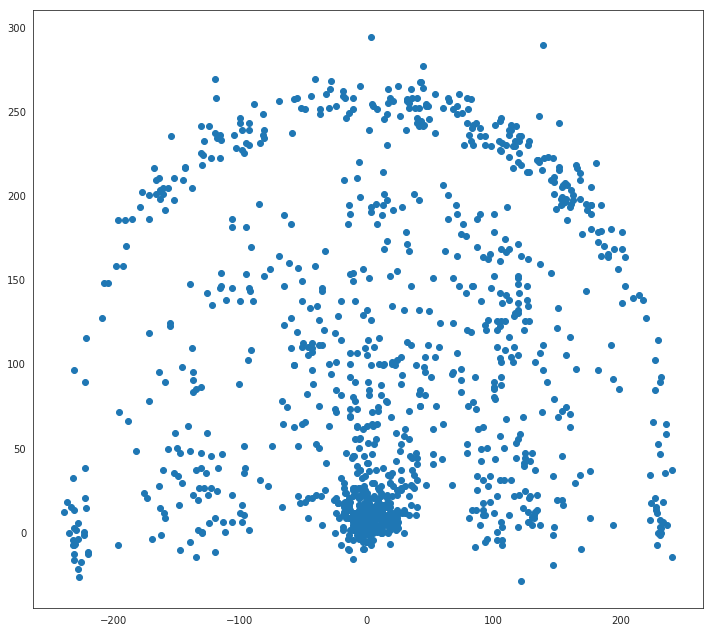

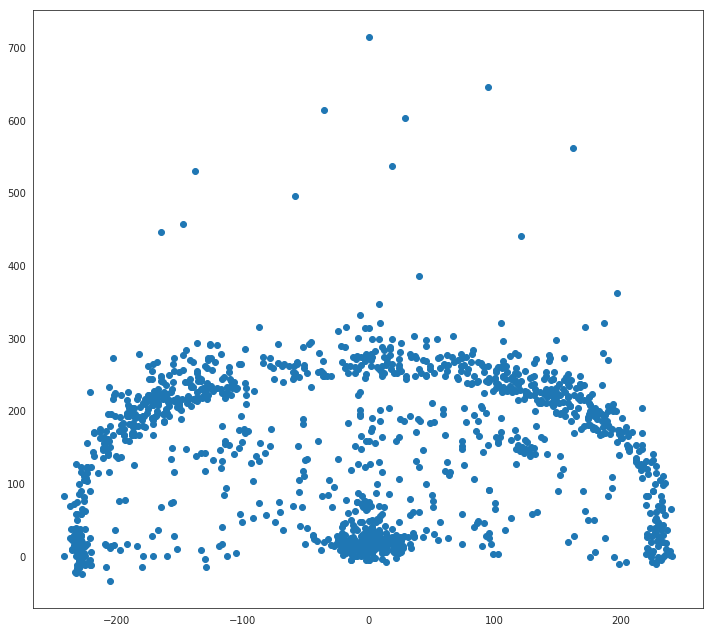

In [25]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots1_df.LOC_X, shots1_df.LOC_Y)
plt.show()
plt.figure(figsize=(12,11))
plt.scatter(shots2_df.LOC_X, shots2_df.LOC_Y)
plt.show()

In [26]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

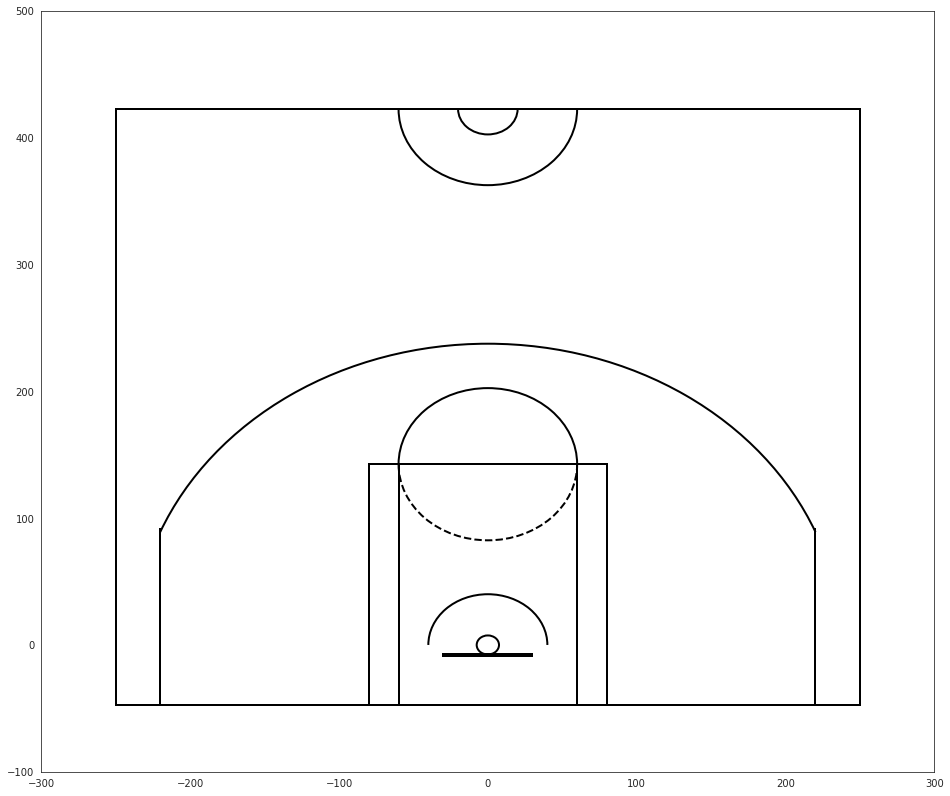

In [27]:
plt.figure(figsize=(16,14))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

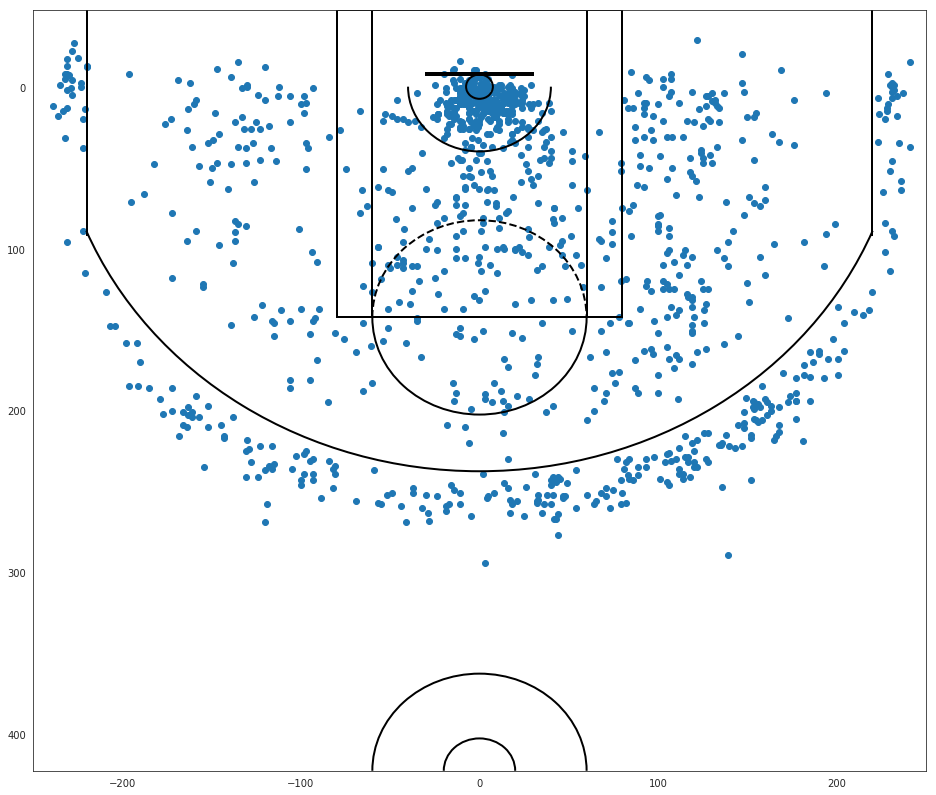

In [28]:
plt.figure(figsize=(16,14))
plt.scatter(shots1_df.LOC_X, shots1_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

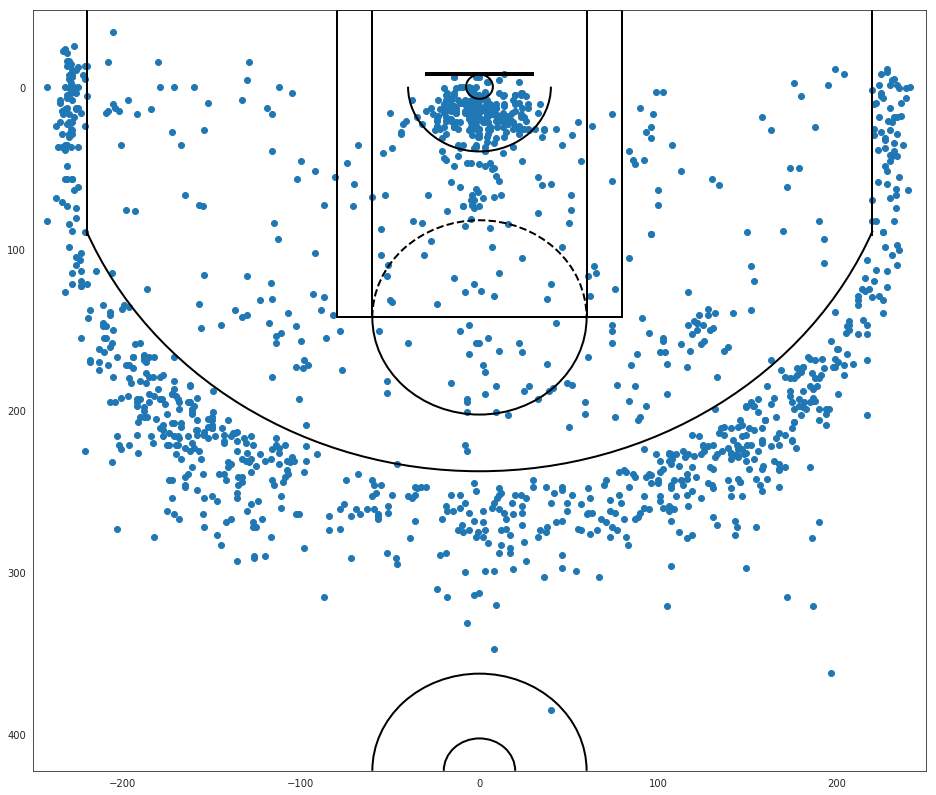

In [29]:
plt.figure(figsize=(16,14))
plt.scatter(shots2_df.LOC_X, shots2_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

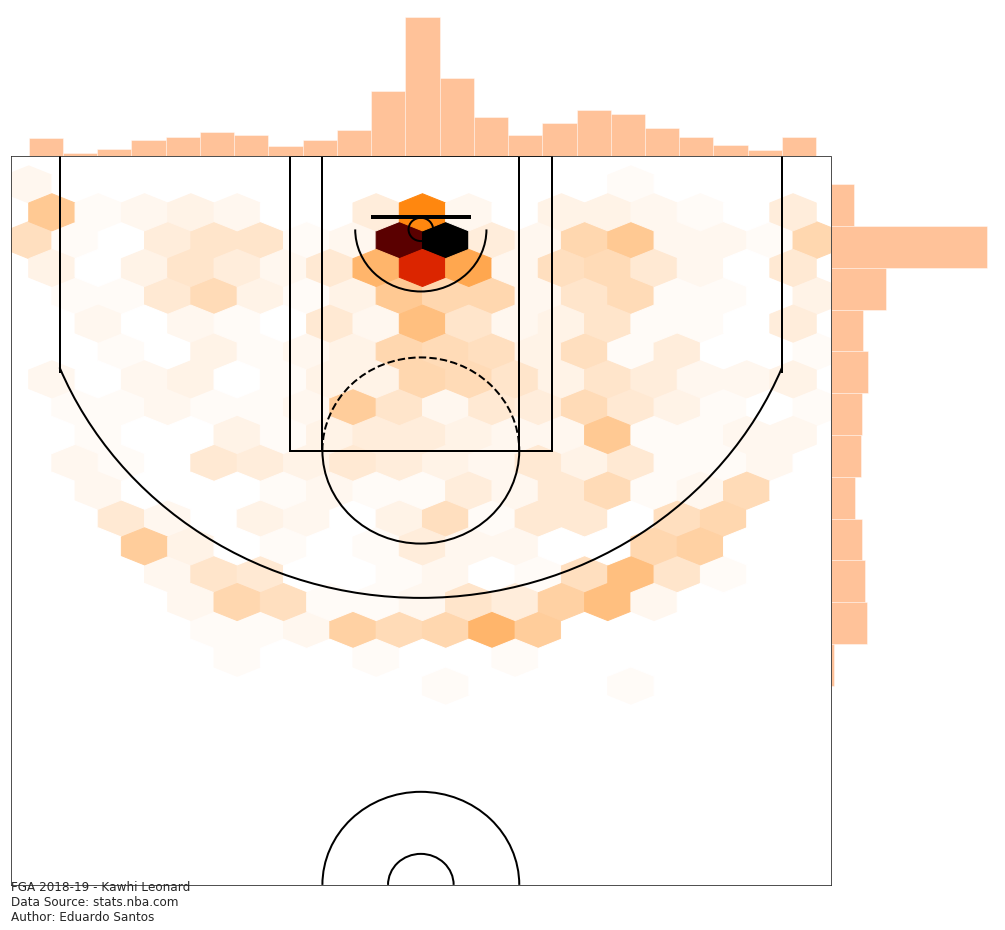

In [30]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shots1_df.LOC_X, shots1_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.3), cmap=cmap)

joint_shot_chart.fig.set_size_inches(16,14)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('FGA 2018-19 - Kawhi Leonard', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'FGA 2018-19 - Kawhi Leonard \nData Source: stats.nba.com'
        '\nAuthor: Eduardo Santos', fontsize=12)


plt.show()

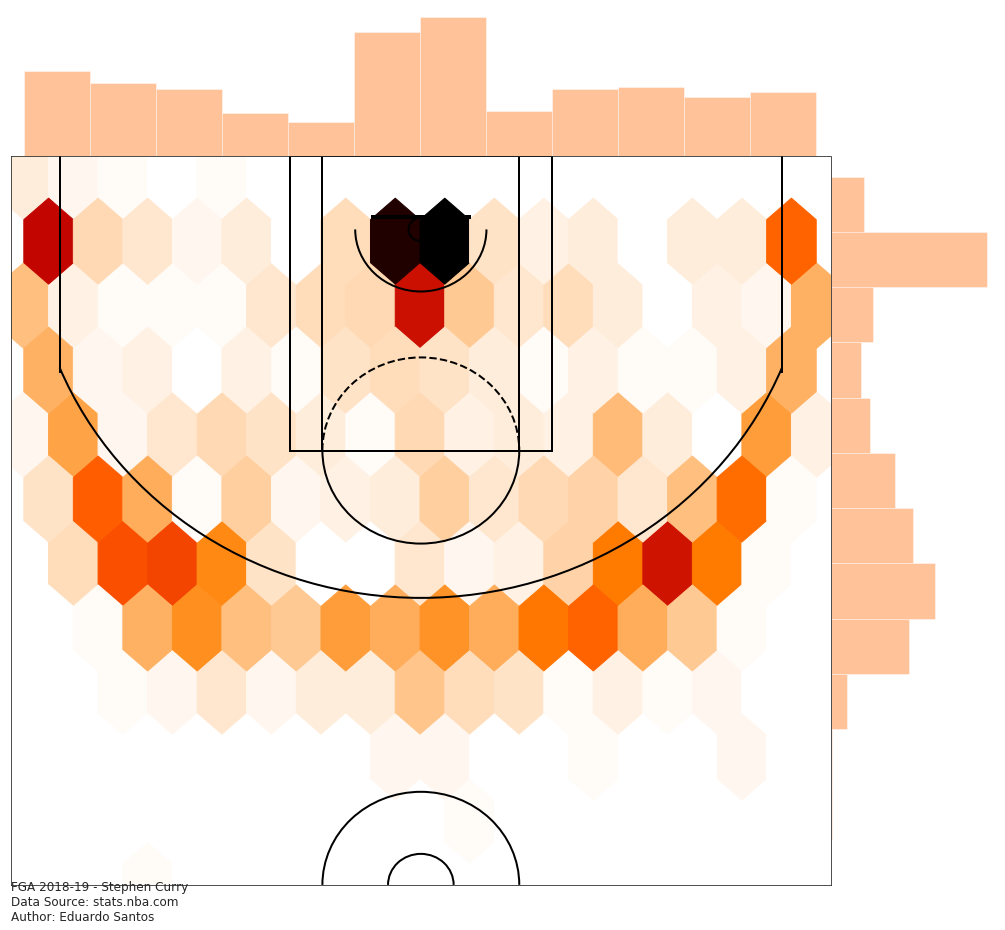

In [31]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shots2_df.LOC_X, shots2_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.3), cmap=cmap)

joint_shot_chart.fig.set_size_inches(16,14)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('FGA 2018-19 - Stephen Curry', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'FGA 2018-19 - Stephen Curry \nData Source: stats.nba.com'
        '\nAuthor: Eduardo Santos', fontsize=12)


plt.show()

In [32]:
from IPython.display import HTML, IFrame

IFrame('https://embed.ted.com/talks/lang/pt-br/rajiv_maheswaran_the_math_behind_basketball_s_wildest_moves', width=854, height=480)

___

# Exercicio 4

Consultando dados do IBGE pela plataforma SIDRA

http://api.sidra.ibge.gov.br/home/ajuda
    

___

# Exercicio 5

Vamos pesquisar filmes na plataforma http://www.omdbapi.com/

Cadastra-se para receber uma API-key para ter acesso a 1000 requests por dia.

In [ ]:
!curl "http://www.omdbapi.com/?t=matrix&y=1999&apikey=2ec0dca4"

In [ ]:
# senha marcos omdb: 57991bf7

In [ ]:
import pandas as pd
ids = pd.read_csv('imdb_list.csv')
ids.head()

In [ ]:
%%time
result=[]
for c, id in enumerate(['tt0133093', 'tt0993846']):
    
    api_base_url = 'http://www.omdbapi.com/?i=' + id + '&apikey=57991bf7'
    api_response = requests.get(api_base_url)
    response = json.loads(api_response.text)

    if c == 0:
        result = pd.DataFrame(response)
    else:
        temp = pd.DataFrame(response)
        result = pd.concat([result, temp])

result.shape

In [ ]:
result

In [ ]:
# for i, row in enumerate(ids['columns']):
#     parametro = 
#     break

In [ ]:
ids['id'] = ids['columns'].str[-9:]
ids.head()

In [ ]:
%%time
result=[]
for c, id in enumerate(ids['id'].values):
    
    api_base_url = 'http://www.omdbapi.com/?i=' + id + '&apikey=57991bf7'
    api_response = requests.get(api_base_url)
    response = json.loads(api_response.text)

    if c == 0:
        result = pd.DataFrame(response)
    else:
        temp = pd.DataFrame(response)
        result = pd.concat([result, temp])

result.shape

In [ ]:
result.shape

In [ ]:
id_example='tt0133093'
api_base_url = 'http://www.omdbapi.com/?i=' + id_example + '&apikey=57991bf7'
api_response = requests.get(api_base_url)
response = json.loads(api_response.text)
pd.DataFrame(response)

In [ ]:
df1 = pd.DataFrame(response)

df2

pd.concat([df1,df2])


In [ ]:
api_base_url = 'http://www.omdbapi.com/?i=tt0133093&apikey=57991bf7'
api_response = requests.get(api_base_url)
response = json.loads(api_response.text)
response

In [ ]:
api_base_url = 'https://dsimdbapi.herokuapp.com/?i=tt3896198'
api_response = requests.get(api_base_url)
response = json.loads(api_response.text)
response

___

# Exercicio 6

Consultando dados de geolocalização com api do google maps

https://cloud.google.com/maps-platform/

https://maps.googleapis.com/maps/api/geocode/json?address=MONROE+860+CABA+ARGENTINA



___

# Próximos passos

Há milhares de APIs e cada uma delas tem um jeito próprio de lidar, ou seja, de fazer nossas solicitações de dados e envio de dados.

Uma das muitas vantagens das APIs é tornar as soluções encaixaveis e reutilizaveis em outros programas.

Na nossa área de ciência de dados, não só utilizamos APIs para consultar dados mas muitas vezes para fornecer nossa aplicação de machine learning como um serviço.

Eu pessoalmente gosto muito de entregar um serviço como uma API e recomendo que comecem a pensar nos serviços que vocês entregam de forma repetitiva da mesma forma.

Uma das vezes que entreguei um projeto (sistema de recomendação de vinhos) utilizei a biblioteca em python `flask` para criar uma API com pouquissimas linhas de código.

Uma dica legal para consultar apis é a plataforma: https://99apis.com/home